In [1]:
import numpy as np
import pandas as pd
import math

class GaussianFuzzyLogic:
    def __init__(self, mean, std_dev):
        self.mean = mean
        self.std_dev = std_dev

    def membership_gaussian(self, x):
        return math.exp(-((x - self.mean) ** 2) / (2 * (self.std_dev ** 2)))

    def centroid(self):
        return self.mean  # The mean of a Gaussian is its centroid

# Load dataset
file_path = 'Student_Marks.csv'
df = pd.read_csv(file_path)

# Assuming the dataset contains a column named 'Marks'
marks = df['Marks']
mean_marks = marks.mean()
std_dev_marks = marks.std()

# Define fuzzy sets based on Gaussian membership functions
low_performance = GaussianFuzzyLogic(mean_marks - std_dev_marks, std_dev_marks)
average_performance = GaussianFuzzyLogic(mean_marks, std_dev_marks)
high_performance = GaussianFuzzyLogic(mean_marks + std_dev_marks, std_dev_marks)

# Input value
input_marks = 75  # Example student marks

# Fuzzification
mu_low = low_performance.membership_gaussian(input_marks)
mu_avg = average_performance.membership_gaussian(input_marks)
mu_high = high_performance.membership_gaussian(input_marks)

print("Membership values:")
print("Low Performance:", mu_low)
print("Average Performance:", mu_avg)
print("High Performance:", mu_high)

# Defuzzification using the centroid method
numerator = (mu_low * low_performance.centroid()) + (mu_avg * average_performance.centroid()) + (mu_high * high_performance.centroid())
denominator = mu_low + mu_avg + mu_high

defuzzified_value = numerator / denominator if denominator != 0 else 0

print("Defuzzified Score:", defuzzified_value)

Membership values:
Low Performance: 3.48703216825419e-05
Average Performance: 0.001963319568271679
High Performance: 0.040666009209292815
Defuzzified Score: 38.061207894379606


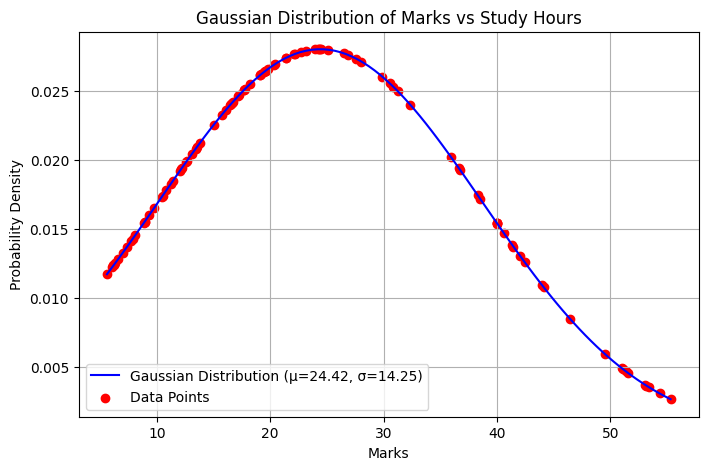

Z1: [0.91980576 0.12165402 0.69991454 0.03579752 0.02739909 0.84001033
 0.65220857 0.84747477 0.95056925 0.60884398 0.17792662 0.20823113
 0.99819747 0.89096314 0.58286454 0.93862835 0.71586015 0.42864892
 0.05385675 0.99784376 0.94922345 0.49501275 0.47950236 0.91444299
 0.84270484 0.24202699 0.22683128 0.98106223 0.14384134 0.27536728
 0.99578562 0.34251477 0.33162329 0.31254686 0.87877202 0.1327951
 0.65384485 0.12042921 0.28732071 0.05059141 0.12143291 0.70965701
 0.92836488 0.34951817 0.39285474 0.38469    0.85770414 0.94986381
 0.79244796 0.93067499 0.28279865 0.98754978 0.19157848 0.48814502
 0.04327814 0.80611326 0.04074672 0.05180364 0.5957973  0.05988611
 0.18198317 0.49938458 0.92564695 0.92407242 0.17523289 0.53478955
 0.81938402 0.14458087 0.29046137 0.97637861 0.85163144 0.59697004
 0.93475089 0.27722603 0.26284997 0.16919454 0.42772951 0.4496789
 0.07618687 0.1714008  0.02870556 0.66603964 0.14234139 0.78703438
 0.57722805 0.36832045 0.99603784 0.18992676 0.41050998 0.34

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def gaussian_membership(x, mean, std_dev):
    return np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Load student marks dataset
df = pd.read_csv('Student_Marks.csv')

# Extract study hours and marks
study_hours = df['time_study'].values
marks = df['Marks'].values

# Fit Gaussian Distributions for study hours and marks
mean_hours, std_hours = np.mean(study_hours), np.std(study_hours)
mean_marks, std_marks = np.mean(marks), np.std(marks)

distribution_hours = norm(mean_hours, std_hours)
distribution_marks = norm(mean_marks, std_marks)

# Compute Z1 and Z2 based on Gaussian membership
Z1 = gaussian_membership(study_hours, mean_hours, std_hours) * gaussian_membership(marks, mean_marks, std_marks)
Z2 = (1 - gaussian_membership(study_hours, mean_hours, std_hours)) * (1 - gaussian_membership(marks, mean_marks, std_marks))

# Defuzzification (Heating Power and Valve Opening)
heating_power = np.sum(Z1 * marks) / np.sum(Z1) if np.sum(Z1) != 0 else 0
valve_opening = np.sum(Z2 * study_hours) / np.sum(Z2) if np.sum(Z2) != 0 else 0

# Plot the Gaussian Distribution
x_values = np.linspace(min(marks), max(marks), 100)
y_values = distribution_marks.pdf(x_values)

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label=f'Gaussian Distribution (μ={mean_marks:.2f}, σ={std_marks:.2f})', color='blue')
plt.scatter(marks, [distribution_marks.pdf(m) for m in marks], color='red', label='Data Points')
plt.xlabel('Marks')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution of Marks vs Study Hours')
plt.legend()
plt.grid()
plt.show()

# Print computed values
print(f"Z1: {Z1}")
print(f"Z2: {Z2}")
print(f"Heating Power: {heating_power}")
print(f"Valve Opening: {valve_opening}")
